In [1]:
import requests

url = "https://dgoldberg.sdsu.edu/515/harrypotter.txt"
response = requests.get(url)
text = response.text

text = " ".join(text.split()) 


In [2]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np

def generate_wordcloud(text, mask=None, save_path="wordcloud.png", max_words=200):
    stopwords = set(STOPWORDS)
    wc = WordCloud(stopwords=stopwords,
                   background_color="white",
                   max_words=max_words,
                   mask=mask,
                   collocations=False,
                   mode="RGBA").generate(text)
    
    if mask is not None:
        color_gen = ImageColorGenerator(mask)
        wc = wc.recolor(color_func=color_gen)
    
    plt.figure(figsize=[10,10])
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.savefig(save_path, dpi=900, facecolor='w', format='png')
    plt.show()


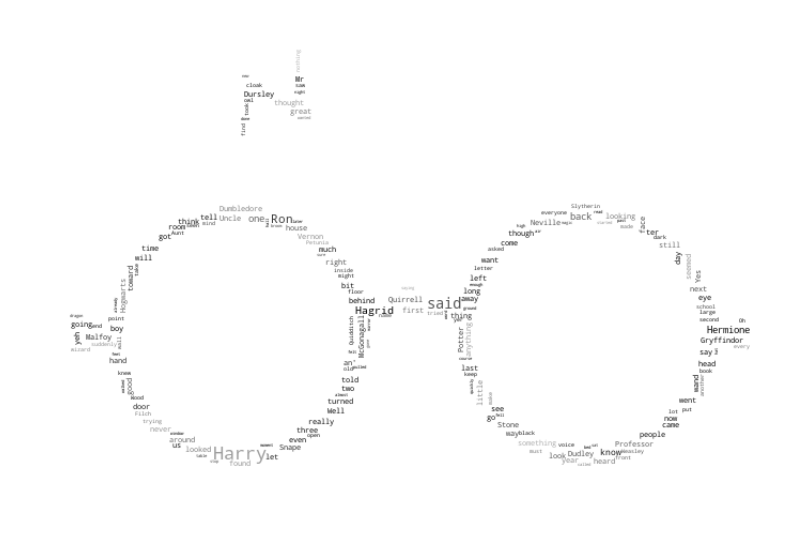

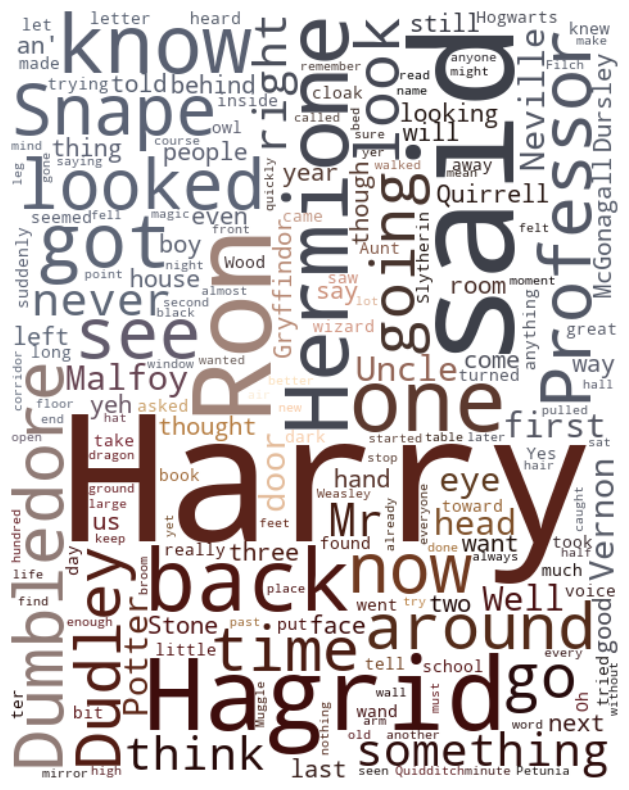

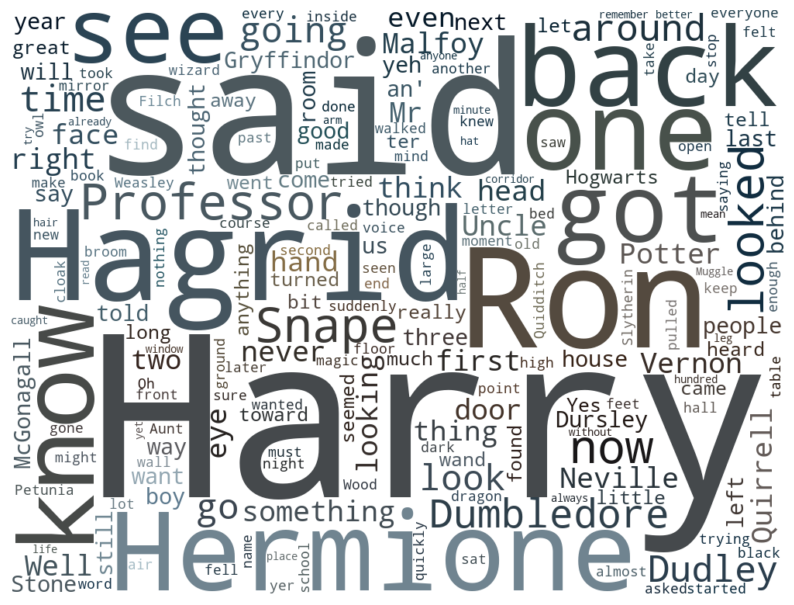

In [4]:
#Load the mask image
mask_image = np.array(Image.open("masks/glasses.png"))
#Generate the word cloud
generate_wordcloud(text, mask=mask_image, save_path="masks/HP_Glasses.png")

mask_image = np.array(Image.open("masks/HarryPotter.png"))
generate_wordcloud(text, mask=mask_image, save_path="masks/HP.png")

mask_image = np.array(Image.open("masks/hogwarts.jpg"))
generate_wordcloud(text, mask=mask_image, save_path="masks/HP_hogwarts.png")
